In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output.csv')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.shape

(3150, 5)

In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.duplicated().sum()

715

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [10]:
df.drop(['date','variation'], axis = 1, inplace = True)	

In [11]:
df['verified_reviews_length'] = df['verified_reviews'].apply(len)

In [12]:
df.head()

,rating,verified_reviews,feedback,verified_reviews_length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5


In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [14]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gratitude\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def word_count(text):
    words = word_tokenize(text)
    return len(words)

In [16]:
df['verified_reviews_word_count'] = df['verified_reviews'].apply(word_count)

In [17]:
def sent_count(text):
    sent = sent_tokenize(text)
    return len(sent)

In [18]:
df['verified_reviews_sent_count'] = df['verified_reviews'].apply(sent_count)

In [19]:
df.head()

,rating,verified_reviews,feedback,verified_reviews_length,verified_reviews_word_count,verified_reviews_sent_count
0,5,Love my Echo!,1,13,4,1
1,5,Loved it!,1,9,3,1
2,4,"Sometimes while playing a game, you can answer...",1,195,41,2
3,5,I have had a lot of fun with this thing. My 4 ...,1,172,38,3
4,5,Music,1,5,1,1


In [20]:
len(df)

2435

In [21]:
df['rating'].value_counts()

5    1756
4     345
1     141
3     113
2      80
Name: rating, dtype: int64

In [22]:
df['rating'].value_counts()/df.shape[0]

5    0.721150
4    0.141684
1    0.057906
3    0.046407
2    0.032854
Name: rating, dtype: float64

In [23]:
df['rating'].value_counts()/df.shape[0]*100

5    72.114990
4    14.168378
1     5.790554
3     4.640657
2     3.285421
Name: rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

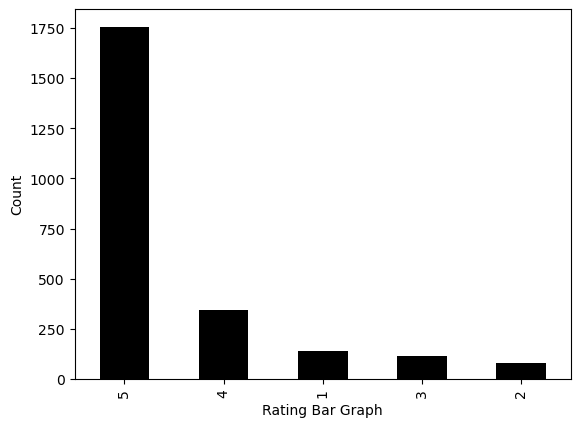

In [24]:
df['rating'].value_counts().plot.bar(color = 'k')      
plt.xlabel('Rating Bar Graph')
plt.ylabel('Count')
plt.show

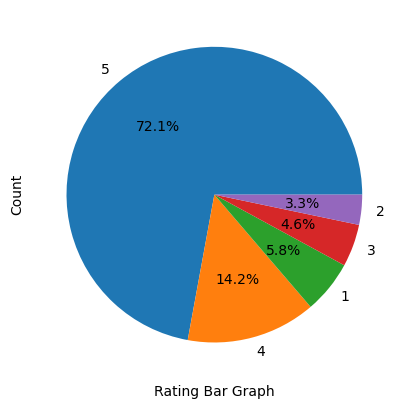

In [25]:
df['rating'].value_counts().plot.pie(autopct = '%1.1f%%')      
plt.xlabel('Rating Bar Graph')
plt.ylabel('Count')
plt.show()

In [26]:
# 1 Those who gave feedback
# 0 Those who don't gave feedback
df['feedback'].value_counts()

1    2214
0     221
Name: feedback, dtype: int64

In [27]:
# 90.92 percent of person has given feedback
# 9.07 percent of person has not given feedback
df['feedback'].value_counts()/df.shape[0]*100

1    90.924025
0     9.075975
Name: feedback, dtype: float64

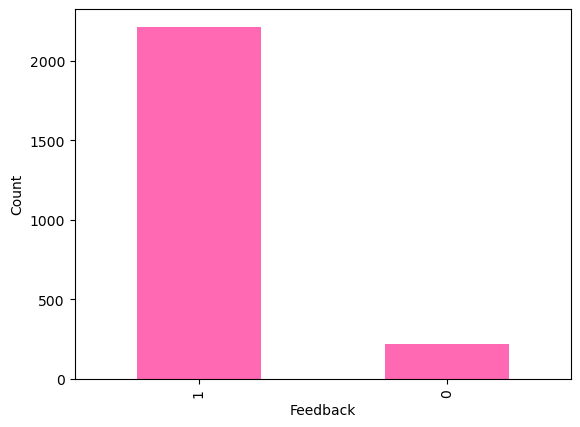

In [28]:
df['feedback'].value_counts().plot.bar(color = 'hotpink')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

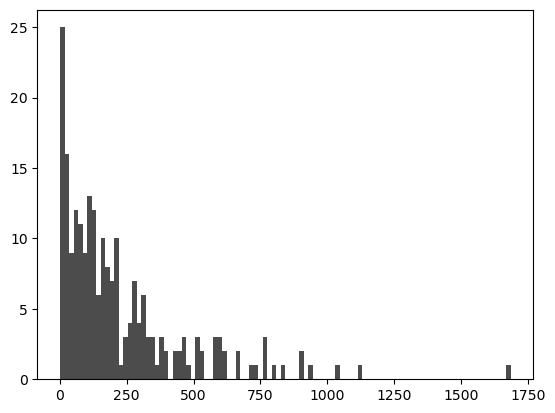

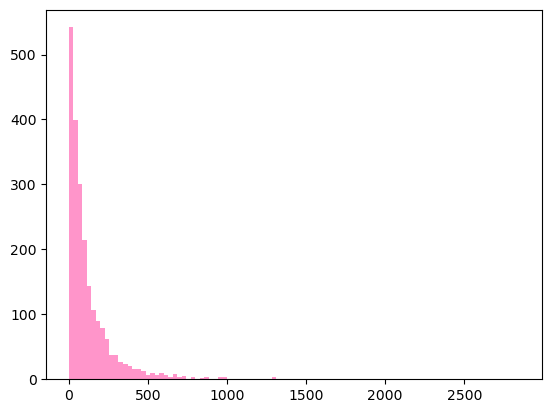

In [29]:
plt.hist(df[df['feedback'] == 0 ]['verified_reviews_length'], bins = 100, alpha=0.7, color = 'k')
plt.show()
plt.hist(df[df['feedback'] == 1 ]['verified_reviews_length'], bins = 100, alpha=0.7, color = 'hotpink')
plt.show()

In [30]:
df[df['feedback'] == 1]['rating'].value_counts()

5    1756
4     345
3     113
Name: rating, dtype: int64

In [31]:
df[df['feedback'] == 0]['rating'].value_counts()

1    141
2     80
Name: rating, dtype: int64

In [32]:
df.shape

(2435, 6)

In [33]:
# Out of 2435 our positive feedback is 2214 and negative feedback is 221

In [34]:
import seaborn as sns

<Axes: xlabel='verified_reviews_length', ylabel='Count'>

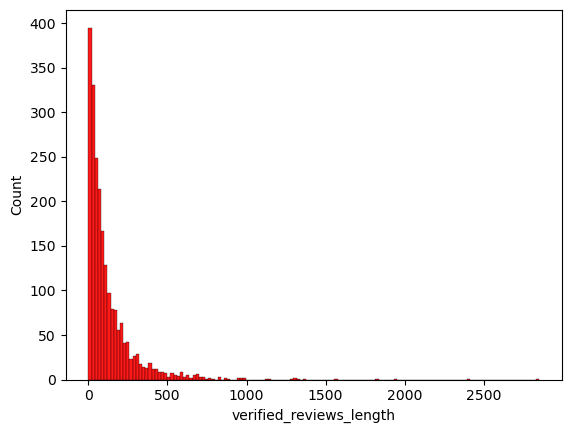

In [67]:
sns.histplot(df[df['feedback'] == 1]['verified_reviews_length'],color = 'r',alpha = 0.9)

<Axes: xlabel='verified_reviews_length', ylabel='Count'>

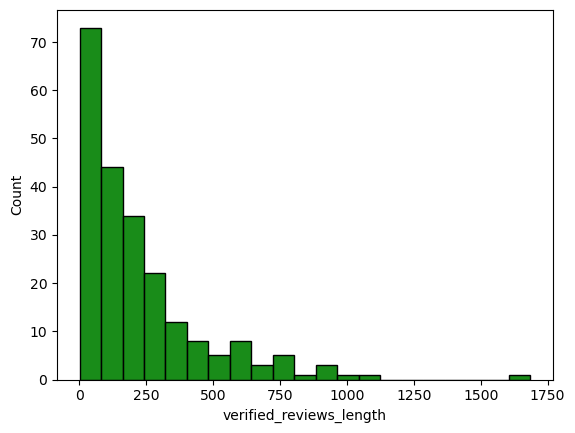

In [68]:
sns.histplot(df[df['feedback'] == 0]['verified_reviews_length'], color = 'green', alpha = 0.9)

In [37]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
df['verified_reviews'] = df['verified_reviews'].str.lower()

In [39]:
df['verified_reviews'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: verified_reviews, dtype: object

In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [42]:
pos_feedback = wc.generate(df[df['feedback'] == 1]['verified_reviews'].str.cat(sep = " "))

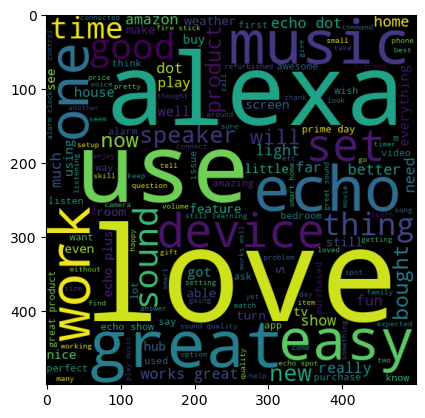

In [43]:
plt.imshow(pos_feedback)

In [44]:
neg_feedback = wc.generate(df[df['feedback'] == 0]['verified_reviews'].str.cat(sep = ' '))

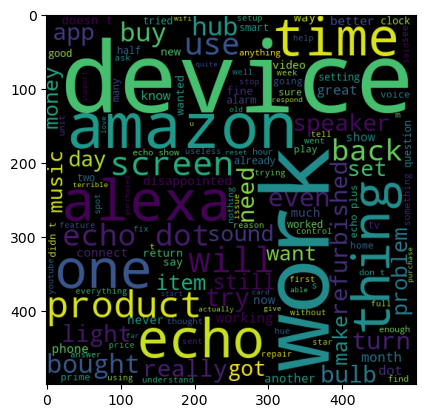

In [45]:
plt.imshow(neg_feedback)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
text_data = df['verified_reviews']

In [48]:
tfidf_vectorizer = TfidfVectorizer()

In [49]:
X = tfidf_vectorizer.fit_transform(text_data)

In [50]:
y = df['feedback']

In [51]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%") 

Accuracy: 90.15%


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
models = RandomForestClassifier(n_estimators=100, random_state=42)
models.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = models.predict(X_test)

In [59]:
accuracy1 = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy1 * 100:.2f}%") 

Accuracy: 90.56%


In [60]:
from sklearn.svm import SVC

In [61]:
svm_classifier = SVC(kernel='linear')

In [62]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
y_predic = svm_classifier.predict(X_test)

In [64]:
accuracyy = accuracy_score(y_test, y_predic)
print(f"Accuracy: {accuracyy*100:.2f}")

Accuracy: 90.97
